In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.lines as mlines
from matplotlib import rc, rcParams
import matplotlib.gridspec as gridspec
GeV = 1e9

In [15]:
fsize = 11
std_figsize = (1.2 * 3.7, 1.6 * 2.3617)
std_axes_form = [0.16, 0.15, 0.81, 0.76]

# standard figure
def std_fig(ax_form=std_axes_form, figsize=std_figsize, rasterized=False):

    rcparams = {
        "axes.labelsize": fsize,
        "xtick.labelsize": fsize,
        "ytick.labelsize": fsize,
        "figure.figsize": std_figsize,
        "legend.frameon": False,
        "legend.loc": "best",
    }
    plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"
    rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
    rc("text", usetex=True)
    rcParams.update(rcparams)
    rcParams["hatch.linewidth"] = 0.3
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes(ax_form, rasterized=rasterized)
    ax.patch.set_alpha(0.0)

    return fig, ax

def read_data(textfile):
    energies, *data = np.loadtxt(textfile, unpack=True)
    data = np.array(data).T
    return energies, data

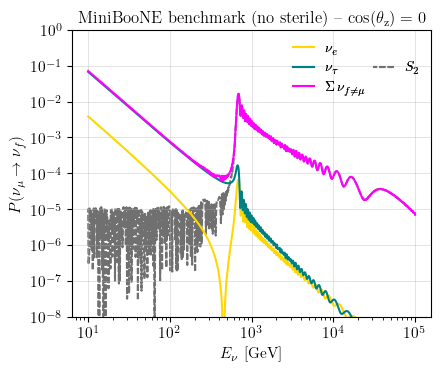

In [16]:
energies, data = read_data("propagation/4_atmos_0.txt")

names = [r'$S_2$', r'$\nu_e$', r'$\Sigma \, {\nu_{f \neq \mu }}$', r'$\nu_\tau$']

fig1, ax = std_fig()
#for i in [0,2]:  # Loop over other columns as y-values
#    ax.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax.plot(energies/GeV, data[:, 1], label= names[1],  color='gold', zorder=2)
ax.plot(energies/GeV, data[:, 3], label= names[3],  color='teal', zorder=2)
ax.plot(energies/GeV, 1 - data[:, 2], label= names[2],  color='magenta', zorder=2)

ax.plot(energies/GeV, data[:, 0], label= names[0],  color=cm.Greys_r(0.2+1/6), ls=(1,(3,1)), zorder=1)

# Create a proxy artist for the empty space
empty_handle = mlines.Line2D([], [], color='none')
# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create custom legend
# First three labels in the first column, fourth label in the second column
legend = plt.legend([handles[0], handles[1], handles[2], empty_handle,handles[3]], 
                    [labels[0], labels[1], labels[2], '', labels[3]],
                    frameon=False, loc='upper right', ncol=2, 
                    handlelength=1.5, columnspacing=0.5)

ax.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax.set_ylabel(r'$P(\nu_\mu \to \nu_f)$')
ax.set_title(r'MiniBooNE benchmark (no sterile) -- $\cos(\theta_{\rm z}) = 0$', fontsize=12)
ax.add_artist(legend)
#ax.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-8,0.03)
yticks = [10**i for i in range(-8, 1)]
ax.set_yticks(yticks)

fig1.savefig('plots/example_3_osc_prob.pdf')

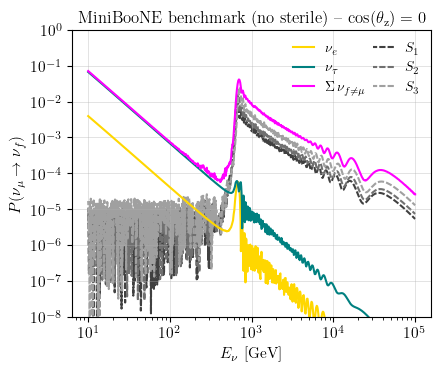

In [17]:
energies, data = read_data("propagation/6_atmos.txt")

names = [r'$S_1$', r'$S_2$', r'$S_3$', r'$\nu_e$', r'$\Sigma \, {\nu_{f \neq \mu }}$', r'$\nu_\tau$']

fig2, ax = std_fig()
#for i in [0,2]:  # Loop over other columns as y-values
#    ax.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax.plot(energies/GeV, data[:, 3], label= names[3],  color='gold', zorder=2)
ax.plot(energies/GeV, data[:, 5], label= names[5],  color='teal', zorder=2)
ax.plot(energies/GeV, 1 - data[:, 4], label= names[4],  color='magenta', zorder=2)


for i in range(3):  # Loop over other columns as y-values
    ax.plot(energies/GeV, data[:, i], label= names[i],  color=cm.Greys_r(0.2+i/6), ls=(1,(3,1)), zorder=1)


ax.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax.set_ylabel(r'$P(\nu_\mu \to \nu_f)$')
ax.set_title(r'MiniBooNE benchmark (no sterile) -- $\cos(\theta_{\rm z}) = 0$', fontsize=12)
ax.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-8,0.03)
yticks = [10**i for i in range(-8, 1)]
ax.set_yticks(yticks)

fig2.savefig('plots/example_1_osc_prob.pdf')

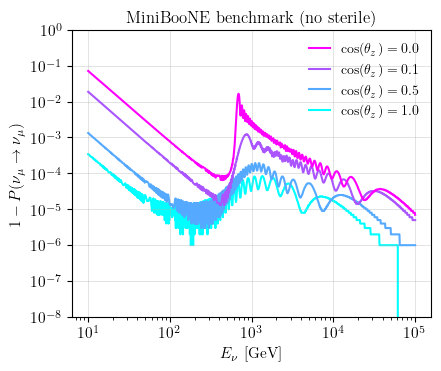

In [18]:
e1, d1 = read_data("propagation/4_atmos_0.txt")
e2, d2 = read_data("propagation/4_atmos_0.1.txt")
e3, d3 = read_data("propagation/4_atmos_0.5.txt")
e4, d4 = read_data("propagation/4_atmos_1.txt")

fig3, ax = std_fig()

ax.plot(e1/GeV, (1 - d1[:, 2]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax.plot(e2/GeV, (1 - d2[:, 2]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax.plot(e3/GeV, (1 - d3[:, 2]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax.plot(e4/GeV, (1 - d4[:, 2]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-8,0.03)
ax.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax.set_ylabel(r'$1 - P(\nu_\mu \to \nu_\mu)$')
ax.set_title(r'MiniBooNE benchmark (no sterile)', fontsize=12)
ax.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)
yticks = [10**i for i in range(-8, 1)]
ax.set_yticks(yticks)

fig3.savefig('plots/example_4_osc_prob.pdf')

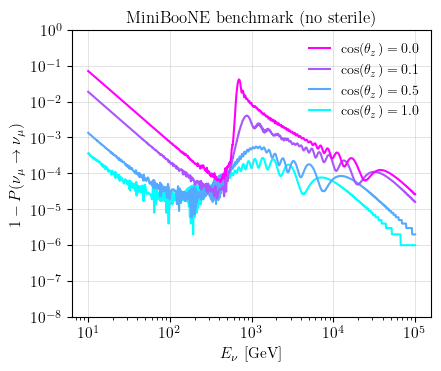

In [19]:
e1, d1 = read_data("propagation/6_atmos.txt")
e2, d2 = read_data("propagation/6_atmos_0.1.txt")
e3, d3 = read_data("propagation/6_atmos_0.5.txt")
e4, d4 = read_data("propagation/6_atmos_1.txt")

fig4, ax = std_fig()

ax.plot(e1/GeV, (1 - d1[:, 4]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax.plot(e2/GeV, (1 - d2[:, 4]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax.plot(e3/GeV, (1 - d3[:, 4]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax.plot(e4/GeV, (1 - d4[:, 4]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-8,0.03)
ax.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax.set_ylabel(r'$1 - P(\nu_\mu \to \nu_\mu)$')
ax.set_title(r'MiniBooNE benchmark (no sterile)', fontsize=12)
ax.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)
yticks = [10**i for i in range(-8, 1)]
ax.set_yticks(yticks)

fig4.savefig('plots/example_2_osc_prob.pdf')

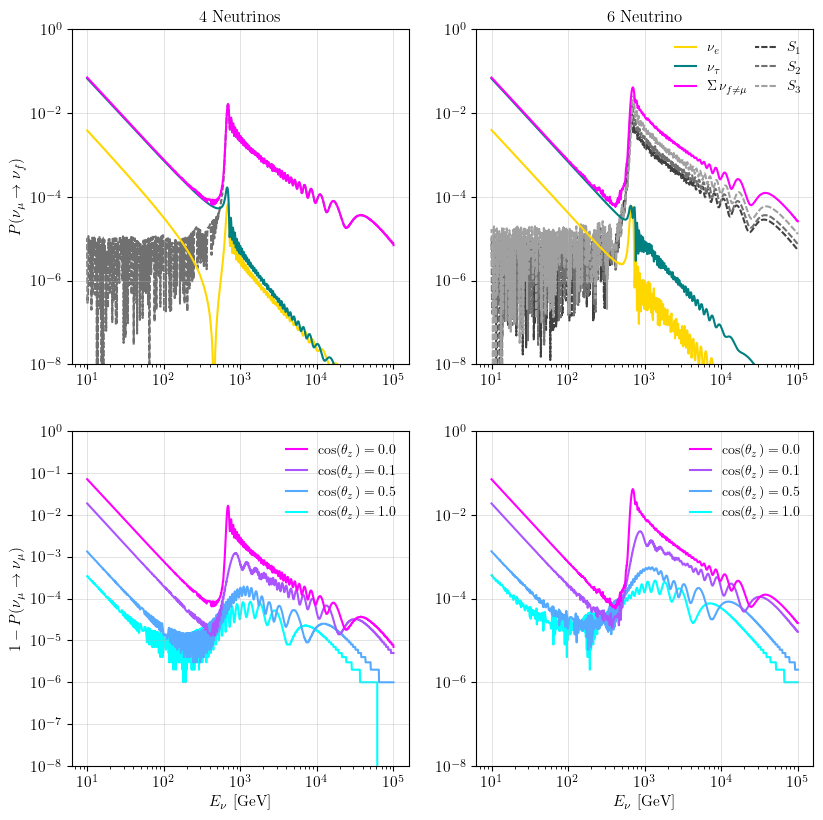

In [36]:
fig = plt.figure(figsize=(20, 20))  # Adjust the size as needed
gs = gridspec.GridSpec(4, 4, figure=fig)

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])

energies, data = read_data("propagation/4_atmos_0.txt")

names = [r'$S_2$', r'$\nu_e$', r'$\Sigma \, {\nu_{f \neq \mu }}$', r'$\nu_\tau$']

#for i in [0,2]:  # Loop over other columns as y-values
#    ax.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax00.plot(energies/GeV, data[:, 1], label= names[1],  color='gold', zorder=2)
ax00.plot(energies/GeV, data[:, 3], label= names[3],  color='teal', zorder=2)
ax00.plot(energies/GeV, 1 - data[:, 2], label= names[2],  color='magenta', zorder=2)

ax00.plot(energies/GeV, data[:, 0], label= names[0],  color=cm.Greys_r(0.2+1/6), ls=(1,(3,1)), zorder=1)

# Create a proxy artist for the empty space
empty_handle = mlines.Line2D([], [], color='none')
# Get handles and labels
handles, labels = ax00.get_legend_handles_labels()

# Create custom legend
# First three labels in the first column, fourth label in the second column
legend = plt.legend([handles[0], handles[1], handles[2], empty_handle,handles[3]], 
                    [labels[0], labels[1], labels[2], '', labels[3]],
                    frameon=False, loc='upper right', ncol=2, 
                    handlelength=1.5, columnspacing=0.5)

ax00.set_ylabel(r'$P(\nu_\mu \to \nu_f)$')
ax00.set_title(r'4 Neutrinos', fontsize=12)
#ax00.add_artist(legend)
#ax00.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax00.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax00.set_yscale('log')
ax00.set_xscale('log')
ax00.set_ylim(1e-8,1)



energies, data = read_data("propagation/6_atmos.txt")

names = [r'$S_1$', r'$S_2$', r'$S_3$', r'$\nu_e$', r'$\Sigma \, {\nu_{f \neq \mu }}$', r'$\nu_\tau$']

#for i in [0,2]:  # Loop over other columns as y-values
#    ax.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax01.plot(energies/GeV, data[:, 3], label= names[3],  color='gold', zorder=2)
ax01.plot(energies/GeV, data[:, 5], label= names[5],  color='teal', zorder=2)
ax01.plot(energies/GeV, 1 - data[:, 4], label= names[4],  color='magenta', zorder=2)


for i in range(3):  # Loop over other columns as y-values
    ax01.plot(energies/GeV, data[:, i], label= names[i],  color=cm.Greys_r(0.2+i/6), ls=(1,(3,1)), zorder=1)


ax01.set_title(r'6 Neutrino', fontsize=12)
ax01.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax01.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax01.set_yscale('log')
ax01.set_xscale('log')
ax01.set_ylim(1e-8,1)




e1, d1 = read_data("propagation/4_atmos_0.txt")
e2, d2 = read_data("propagation/4_atmos_0.1.txt")
e3, d3 = read_data("propagation/4_atmos_0.5.txt")
e4, d4 = read_data("propagation/4_atmos_1.txt")

ax10.plot(e1/GeV, (1 - d1[:, 2]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax10.plot(e2/GeV, (1 - d2[:, 2]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax10.plot(e3/GeV, (1 - d3[:, 2]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax10.plot(e4/GeV, (1 - d4[:, 2]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


ax10.set_yscale('log')
ax10.set_xscale('log')
ax10.set_ylim(1e-8,0.03)
ax10.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax10.set_ylabel(r'$1 - P(\nu_\mu \to \nu_\mu)$')
ax10.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax10.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)


e1, d1 = read_data("propagation/6_atmos.txt")
e2, d2 = read_data("propagation/6_atmos_0.1.txt")
e3, d3 = read_data("propagation/6_atmos_0.5.txt")
e4, d4 = read_data("propagation/6_atmos_1.txt")

ax11.plot(e1/GeV, (1 - d1[:, 4]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax11.plot(e2/GeV, (1 - d2[:, 4]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax11.plot(e3/GeV, (1 - d3[:, 4]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax11.plot(e4/GeV, (1 - d4[:, 4]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


ax11.set_yscale('log')
ax11.set_xscale('log')
ax11.set_ylim(1e-8,1)
ax11.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax11.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax11.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)










plt.show()

